In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path_ames_train = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/train_linear_regression.csv'
path_ames_test = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/test_linear_regression.csv'

In [3]:
train = pd.read_csv(path_ames_train)
test = pd.read_csv(path_ames_test)

X_train = train.iloc[ : , : -1]

y_train = train.iloc[:, -1]

X_test = test.iloc[ : , : -1]

y_test = test.iloc[:, -1]

X_train.head()
y_train.head()
X_test.head()
y_test.head()

0    257500
1    185000
2    130000
3    112000
4    148000
Name: SalePrice, dtype: int64

In [52]:
def estimate_coef(x, y):
    # number of observations/points
    sample_size = len(x)
 
    # mean of x and y vector
    x_mean, y_mean = x.mean(), y.mean()
 
    # calculating cross-deviation and deviation about x
    cross_x_y = (x * y).sum() - sample_size * x_mean * y_mean
    dev_x = (x**2).sum() - sample_size * (x_mean**2)
    print(cross_x_y, dev_x)
    # calculating regression coefficients
    slope = cross_x_y / dev_x
    intercept = y_mean - slope * x_mean
    values = (intercept, slope)
 
    return values
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.figure(figsize = (10, 8))
    plt.scatter(x, y)
    
    # predicted response vector
    y_pred = b[0] + b[1] * test['GarageArea']
    

 
    # plotting the regression line
    plt.plot(x,y,'o', test['GarageArea'], y_pred)
 
    # putting labels
    plt.xlabel('Garage Area')
    plt.ylabel('Sales Price')
    plt.title('Garage Area vs Sales Price')
 
    # function to show plot
    plt.show()

# Visualize your results


In [57]:
train.cov()

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
ExterQual,0.293964,9.505421e+01,9.376771e+01,-0.026254,4.921501e+01,0.206298,1.046026,2.483606e+04
AllFlrsSF,95.054210,1.804332e+05,1.800530e+05,-19.099385,3.526878e+04,501.135346,1433.220042,1.892489e+07
GrLivArea,93.767710,1.800530e+05,1.813035e+05,-19.045109,3.468035e+04,504.948129,1445.890145,1.872782e+07
SimplOverallCond,-0.026254,-1.909938e+01,-1.904511e+01,0.194481,-1.188012e+01,-0.037089,-0.629599,-1.941760e+03
GarageArea,49.215006,3.526878e+04,3.468035e+04,-11.880123,3.777201e+04,77.571786,992.087776,8.094921e+06
TotRmsAbvGrd,0.206298,5.011353e+02,5.049481e+02,-0.037089,7.757179e+01,2.139714,7.313063,4.561356e+04
LotFrontage,1.046026,1.433220e+03,1.445890e+03,-0.629599,9.920878e+02,7.313063,986.795885,3.129908e+05
SalePrice,24836.060429,1.892489e+07,1.872782e+07,-1941.759886,8.094921e+06,45613.563934,312990.755928,4.353656e+09


8831558900.719788 41209263.24175826


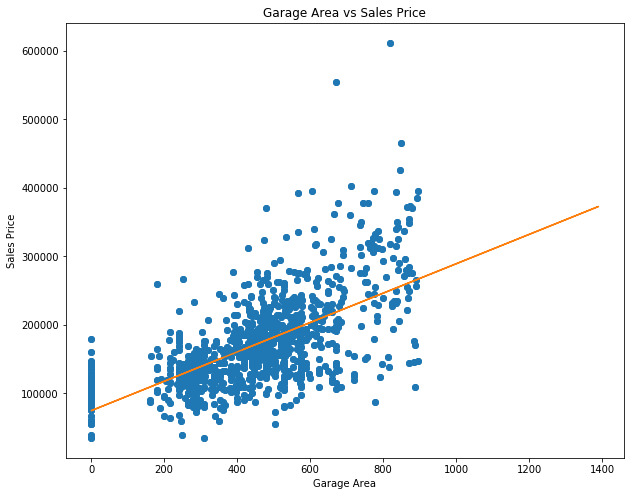

In [54]:
values = estimate_coef(train['GarageArea'], train['SalePrice'])

plot_regression_line(train['GarageArea'], train['SalePrice'], values)

In [6]:
linreg = LinearRegression()

y_train = np.log(y_train)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

y_pred

array([12.11227082, 12.19875709, 12.17873549, 12.09451926, 11.79496421,
       11.62810742, 12.23094302, 11.66779875, 12.83933008, 11.42802489,
       13.03969447, 11.48996121, 11.96267792, 12.15572954, 11.84253379,
       11.80049608, 11.63719563, 11.95712008, 12.33129216, 12.18239258,
       12.02229166, 12.0255932 , 12.23719561, 11.87200608, 12.44798664,
       12.643851  , 12.47162239, 12.5982682 , 11.8215798 , 11.50148537,
       11.789251  , 13.22072258, 11.50903908, 11.87175444, 12.20648447,
       12.23039239, 11.69069064, 12.89000353, 11.7661653 , 12.30551334,
       12.29771967, 11.68183125, 12.84865739, 11.97590572, 12.48417858,
       12.05078167, 11.76415223, 11.68701845, 12.25244997, 12.23563131,
       11.51096238, 12.6868023 , 11.79805816, 11.80839364, 12.05803133,
       12.79445006, 12.15644059, 12.02083321, 11.5972928 , 12.61133737,
       12.17873549, 12.98542578, 12.19936653, 11.39135943, 11.90586361,
       11.8061422 , 11.79982215, 11.72513481, 11.82121504, 11.56

# Linear Regression Assessment 

In [7]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/legos_dataset.csv'

In [8]:
df = pd.read_csv(path)

df.head()

y = df['list_price']

cols = [cols for cols in df if cols != 'list_price']

X = df[cols]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

In [9]:
df.columns.shape

(10,)

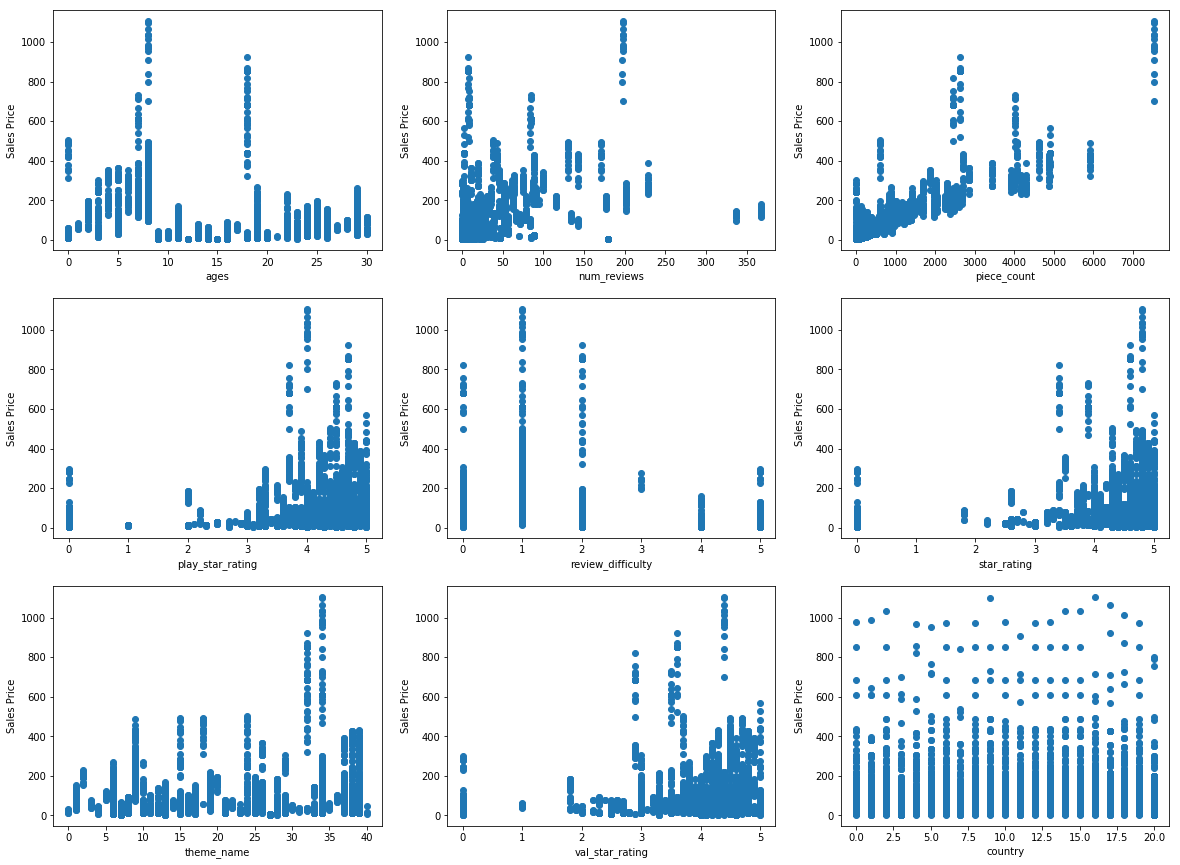

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))
for i,j in np.ndindex(axes.shape):
    axes[i, j].scatter(x = X[cols[3*i + j]], y= y)
    axes[i, j].set(xlabel = cols[3*i + j], ylabel = 'Sales Price')
    

{'val_star_rating', 'play_star_rating', 'star_rating'}


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


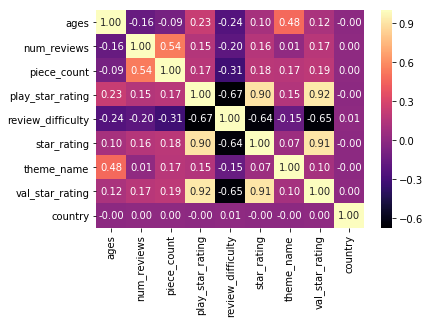

In [11]:
corr = X_train.corr()

sns.heatmap(data = corr,annot=True, fmt='.2f', cmap='magma' )

highly_correlated_features = set()
for col in corr:
    for index in corr.index :
        if (corr[index][col] > 0.75 or corr[index][col] < -0.75) :
            if index != col :
                highly_correlated_features.add(index)
print(highly_correlated_features)

corr['ages']['num_reviews']

highly_correlated_features

X_train.drop(columns = ['play_star_rating', 'val_star_rating'], axis=1, inplace=True)

X_test.drop(columns = ['play_star_rating', 'val_star_rating'], axis=1, inplace=True)

In [12]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

r2 = r2_score(y_test, y_pred)
print(r2)

In [23]:
type(y_test)

pandas.core.series.Series

In [38]:
residue = y_test - y_pred

plt.figure(figsize=(10, 8))
sns.distplot(a=residue, bins=10)
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.title('Histogram for Residual Errors')
plt.show()

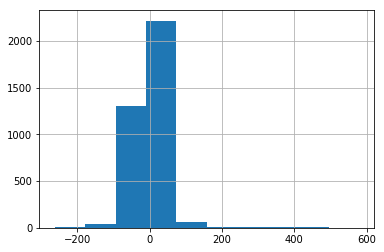

In [48]:
residue.hist(bins=10)